In [1]:
%matplotlib widget
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from tqdm import tqdm
import glob
import cv2

import os
import sys  
import re
import shutil
sys.path.insert(0, '../dip_utils')

from matrix_utils import arr_info
from vis_utils import (vis_rgb_cube,
                       vis_hists,
                       vis_pair, 
                       vis_triple)
%run watershed.ipynb
%run calibrate.ipynb
%run greyscale.ipynb
%run image_stacking.ipynb
%run whitep_elimination.ipynb
%run skew_correction.ipynb
%run model.ipynb
%run turb_est_onetrail.ipynb

In [2]:
path = '../image_set'
dest = '../stacked_new'
test = '../stacked_test'

In [3]:
files = glob.glob('%s/*' % dest)
for f in files:
    os.remove(f)

In [4]:
files = glob.glob('%s/*' % test)
for f in files:
    os.remove(f)

In [5]:
image_stacking(path, dest)

In [6]:
img_lib = []
img_lib_c = []
for dic in os.listdir(dest):
    if dic != '.ipynb_checkpoints':
        img_lib.append(dic)
        img_lib_c.append(dic)

In [7]:
img_lib[0]

'NTU0.jpg'

In [ ]:
# predicted_NTU = []
# actual_NTU = []
# for i in tqdm(range(1, len(img_lib_c)-1)):
#     if img_lib[i] == 'NTU0.jpg':
#         pass
#     else:
#         for f in glob.glob('%s/*' % test):
#             os.remove(f)
#         temp_img = []
#         # Leave one out strategy
#         shutil.move(("%s/%s" % (dest, img_lib[i])) , ("%s/%s" % (test, img_lib[i])))
#         shutil.move(("%s/%s" % (dest, img_lib[i+1])) , ("%s/%s" % (test, img_lib[i+1])))
#         test_img1 = img_lib.pop(i)
#         test_img2 = img_lib.pop(i)
#         temp_img.append(test_img1)
#         temp_img.append(test_img2)
#         # Get theta value out of the 58 (59-1)datapoints
#         theta, h, w, diff_c, ref = process_model(dest, img_lib) 
#         estimation, NTU = TE_img_list(test, temp_img, theta, h, w, ref, diff_c)
#         predicted_NTU.append(estimation)
#         actual_NTU.append(NTU)
#         shutil.move(("%s/%s" % (test, test_img1)) , ("%s/%s" % (dest, test_img1)))
#         shutil.move(("%s/%s" % (test, test_img2)) , ("%s/%s" % (dest, test_img2)))
#         img_lib.insert(i, test_img1)
#         img_lib.insert(i+1, test_img2)

In [9]:
# predicted_NTU

In [10]:
predicted_NTU = []
actual_NTU = []
for i in tqdm(range(1, len(img_lib_c))):
    if img_lib[i] == 'NTU0.jpg':
        pass
    else:
        for f in glob.glob('%s/*' % test):
            os.remove(f)
            
        # Leave one out strategy
        shutil.move(("%s/%s" % (dest, img_lib[i])) , ("%s/%s" % (test, img_lib[i])))
        test_img = img_lib.pop(i)
        # Get theta value out of the 58 (59-1)datapoints
        theta, h, w, diff_c, ref = process_model(dest, img_lib) 
        estimation, NTU = TE_img_list(test, test_img, theta, h, w, ref, diff_c)
        predicted_NTU.append(estimation)
        actual_NTU.append(NTU)
        shutil.move(("%s/%s" % (test, test_img)) , ("%s/%s" % (dest, test_img)))
        img_lib.insert(i, test_img)

100%|███████████████████████████████████████████| 57/57 [10:18<00:00, 10.86s/it]


In [42]:
NTU = []
for i in range(len(actual_NTU)):
    NTU.append(abs(float(actual_NTU[i][1][0])))

In [43]:
pair = dict(zip(NTU, predicted_NTU))

In [44]:
od_NTU = []
od_estimated = []
error = []
for key, value in sorted(pair.items()):
    od_NTU.append(key)
    od_estimated.append(abs(value))

In [45]:
for i in range(len(od_NTU)):
    error.append(abs(od_NTU[i] - od_estimated[i]))

In [46]:
error

[13.260000000000002,
 10.410000000000004,
 3.190000000000005,
 7.170000000000002,
 12.46,
 28.13000000000001,
 51.22,
 11.469999999999999,
 13.79,
 14.919999999999987,
 3.3599999999999994,
 20.080000000000013,
 18.680000000000007,
 14.090000000000003,
 5.980000000000004,
 22.789999999999992,
 13.959999999999994,
 17.72999999999999,
 7.5,
 33.55000000000001,
 28.889999999999986,
 8.030000000000001,
 36.889999999999986,
 32.78,
 43.139999999999986,
 12.77000000000001,
 34.68000000000001,
 2.9099999999999966,
 21.180000000000007,
 0.710000000000008,
 6.810000000000002,
 19.69999999999999,
 9.210000000000008,
 3.990000000000009,
 26.189999999999998,
 25.24000000000001,
 13.419999999999987,
 17.590000000000003,
 21.370000000000005,
 22.720000000000027,
 33.599999999999994,
 47.889999999999986,
 16.74000000000001,
 50.49000000000001,
 5.7099999999999795,
 48.33000000000001,
 37.66,
 6.889999999999986,
 24.399999999999977,
 7.0400000000000205,
 16.610000000000014,
 20.170000000000016,
 21.649

In [47]:
np.mean(np.array(error))

19.079824561403512

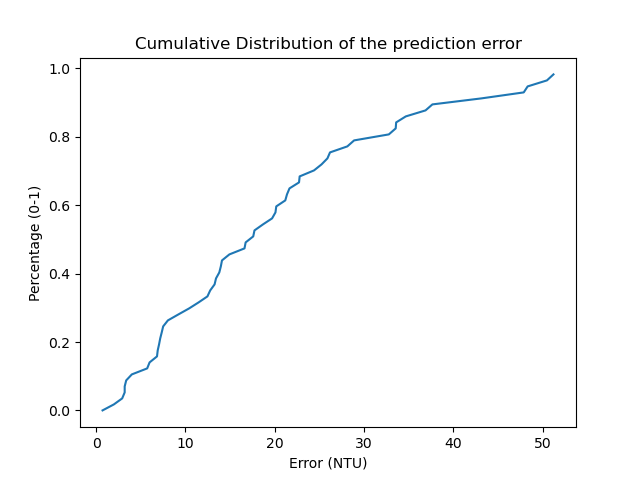

In [48]:
x, y = sorted(error), np.arange(len(error)) / len(error)
plt.figure()
plt.title('Cumulative Distribution of the prediction error')
plt.xlabel('Error (NTU)')
plt.ylabel('Percentage (0-1)')
plt.plot(x, y)

In [49]:
plt.tight_layout()

In [50]:
plt.savefig('../assets/error_cdf.pdf', dpi=600)

In [19]:
r2 = r2_score(od_NTU, od_estimated)
r2 = round(r2, 3)

In [32]:
r2

0.949

In [21]:
df = pd.DataFrame(list(zip(od_NTU, od_estimated)),
               columns =['Actual_NTU', 'Estimated_NTU'])
df.to_csv('../assets/prediction.csv')

In [22]:
# Figure 10
model = ols('Estimated_NTU ~ Actual_NTU', data=df).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Estimated_NTU   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     1045.
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           1.83e-37
Time:                        14:34:21   Log-Likelihood:                -256.55
No. Observations:                  57   AIC:                             517.1
Df Residuals:                      55   BIC:                             521.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.8629      5.904      2.517      0.0

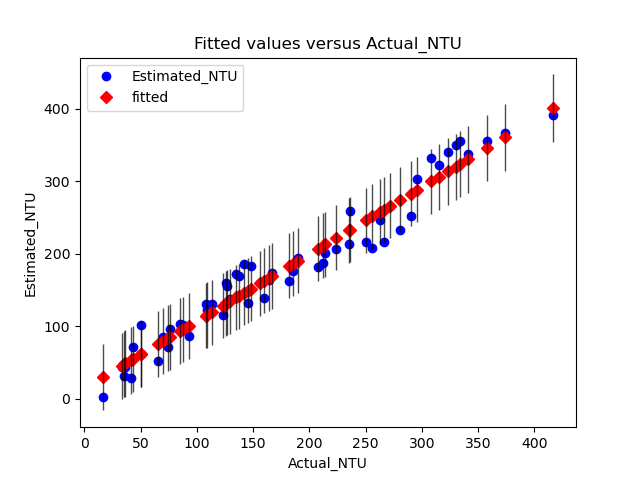

In [37]:
#fig, ax = plt.subplots()

#produce regression plots
#fig = sm.graphics.plot_regress_exog(model, 'pixel_intensity', fig=fig)

fig = sm.graphics.plot_fit(model, 'Actual_NTU')
plt.savefig('../assets/test_fit.pdf', dpi=600)

In [24]:
# fig.tight_layout()
# plt.axis('square')

(-3.9450000000000003, 505.7130986572308, -39.24565968284844, 470.4124389743823)

In [38]:
plt.grid(True)
plt.xlim(0, 450)
plt.ylim(0, 450)
plt.tight_layout()

In [39]:
plt.savefig('../assets/test_fit.pdf', dpi=600)